In [54]:
# Ferramentas matemáticas
import numpy as np
from numpy import pi
from qiskit import QuantumRegister, ClassicalRegister
# Ferramentas para manipulação dos circuitos
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_bloch_vector


11P) Crie um circuito quântico e faça a codificação para cada uma das strings a seguir.
Em seguida, realize as medições necessárias. Mostre o diagrama de circuito e o
histograma do resultado de simulação utilizando um simulador.


a) A = 10011101 (realize a medição de todos os qubits)


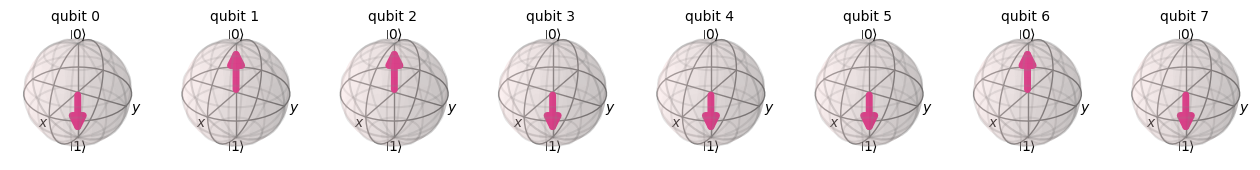

┌───┐┌───┐┌───┐┌───┐     ┌───┐┌───┐     ┌─┐                        »
q_0: ─|0>─┤ X ├┤ H ├┤ X ├┤ Z ├─────┤ X ├┤ H ├─────┤M├────────────────────────»
          ├───┤└───┘└─┬─┘├───┤┌───┐└─┬─┘├───┤┌───┐└╥┘     ┌─┐                »
q_1: ─|0>─┤ H ├───────■──┤ X ├┤ Z ├──■──┤ X ├┤ H ├─╫──────┤M├────────────────»
          ├───┤          └─┬─┘├───┤┌───┐└─┬─┘├───┤ ║ ┌───┐└╥┘     ┌─┐        »
q_2: ─|0>─┤ H ├────────────■──┤ X ├┤ Z ├──■──┤ X ├─╫─┤ H ├─╫──────┤M├────────»
          ├───┤┌───┐          └─┬─┘├───┤┌───┐└─┬─┘ ║ ├───┤ ║ ┌───┐└╥┘     ┌─┐»
q_3: ─|0>─┤ X ├┤ H ├────────────■──┤ X ├┤ Z ├──■───╫─┤ X ├─╫─┤ H ├─╫──────┤M├»
          ├───┤├───┤               └─┬─┘├───┤┌───┐ ║ └─┬─┘ ║ ├───┤ ║ ┌───┐└╥┘»
q_4: ─|0>─┤ X ├┤ H ├─────────────────■──┤ X ├┤ Z ├─╫───■───╫─┤ X ├─╫─┤ H ├─╫─»
          ├───┤├───┤                    └─┬─┘├───┤ ║ ┌───┐ ║ └─┬─┘ ║ ├───┤ ║ »
q_5: ─|0>─┤ X ├┤ H ├──────────────────────■──┤ X ├─╫─┤ Z ├─╫───■───╫─┤ X ├─╫─»
          ├───┤└───┘                         └─┬─┘ ║ ├───┤ ║ ┌───┐ ║ └─┬─┘ ║ »
q_6: ─|0>─┤ H ├────────────────────────────────■───╫─┤ X ├─╫─┤ Z ├─╫───■───╫─»
          ├───┤┌───┐                               ║ └─┬─┘ ║ ├───┤ ║       ║ »
q_7: ─|0>─┤ X ├┤ H ├───────────────────────────────╫───■───╫─┤ Z ├─╫───────╫─»
          └───┘└───┘                               ║       ║ └───┘ ║       ║ »
c: 8/══════════════════════════════════════════════╩═══════╩═══════╩═══════╩═»
                                                   0       1       2       3 »
«                           
«q_0: ──────────────────────
«                           
«q_1: ──────────────────────
«                           
«q_2: ──────────────────────
«                           
«q_3: ──────────────────────
«          ┌─┐              
«q_4: ─────┤M├──────────────
«     ┌───┐└╥┘     ┌─┐      
«q_5: ┤ H ├─╫──────┤M├──────
«     ├───┤ ║ ┌───┐└╥┘┌─┐   
«q_6: ┤ X ├─╫─┤ H ├─╫─┤M├───
«     └─┬─┘ ║ ├───┤ ║ └╥┘┌─┐
«q_7: ──■───╫─┤ H ├─╫──╫─┤M├
«           ║ └───┘ ║  ║ └╥┘
«c: 8/══════╩═══════╩══╩══╩═
«           4       5  6  7

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_87040/1658429631.py:46: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


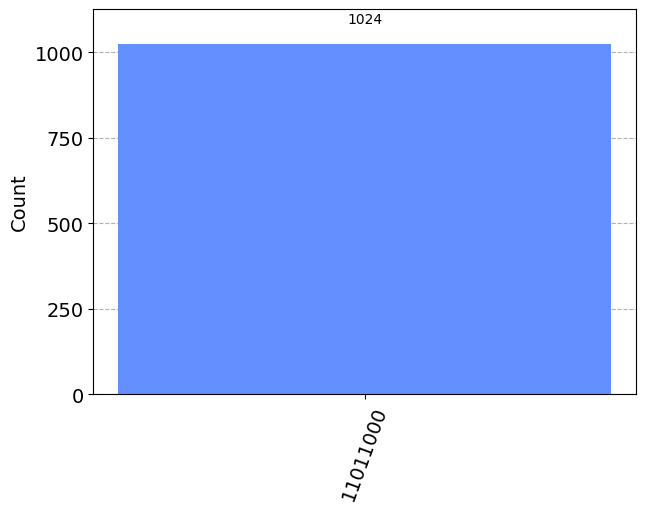

In [55]:
qreg_q = QuantumRegister(8, 'q')
creg_c = ClassicalRegister(8, 'c')
qc = QuantumCircuit(qreg_q, creg_c)

qc.reset(qreg_q[0]) ;qc.x(qreg_q[0])   # 1
qc.reset(qreg_q[1]) 
qc.reset(qreg_q[2])
qc.reset(qreg_q[3]);qc.x(qreg_q[3])   # 1
qc.reset(qreg_q[4]);qc.x(qreg_q[4])   # 1
qc.reset(qreg_q[5]);qc.x(qreg_q[5])   # 1
qc.reset(qreg_q[6])
qc.reset(qreg_q[7]);qc.x(qreg_q[7])   # 1

# Executa no simulador e plota na esfera de Bloch (antes)
sim = Aer.get_backend("aer_simulator")
qc_sv = qc.copy()
qc_sv.save_statevector()
statevector = sim.run(qc_sv).result().get_statevector()
display(plot_bloch_multivector(statevector))
for i in range(0,8):
    qc.h(qreg_q[i])

for i in range(0,7):
    qc.cx(qreg_q[i+1],qreg_q[i])

for i in range(0,8):
    qc.z(qreg_q[i])


for i in range(0,7):
    qc.cx(qreg_q[i+1],qreg_q[i])

for i in range(0,8):
    qc.h(qreg_q[i])   

for i in range(0,8):
    qc.measure(qreg_q[i],creg_c[i])   
display(qc.draw())

# Excecuta em um simulador
aer_sim = Aer.get_backend('aer_simulator')
t_dj_circuit = transpile(qc, aer_sim)
qobj = assemble(t_dj_circuit, aer_sim)

# Obtém os resultados
results = aer_sim.run(qobj).result()
answer = results.get_counts()

# Mostra os resultados
plot_histogram(answer)

b) B = 10101010 (realize a medição apenas dos qubits inicializados em |1⟩)


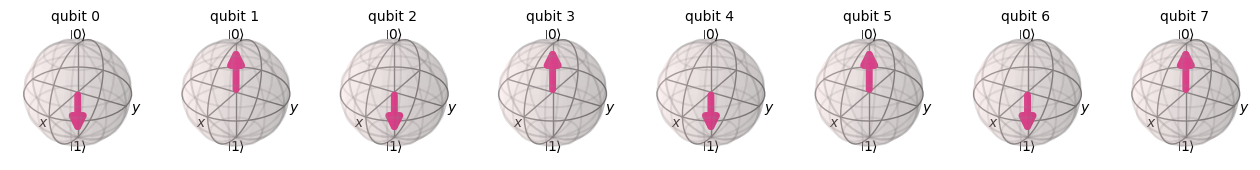

┌───┐┌───┐┌───┐┌───┐     ┌───┐┌───┐     ┌─┐                          »
q_0: ─|0>─┤ X ├┤ H ├┤ X ├┤ Z ├─────┤ X ├┤ H ├─────┤M├──────────────────────────»
          ├───┤└───┘└─┬─┘├───┤┌───┐└─┬─┘├───┤┌───┐└╥┘                          »
q_1: ─|0>─┤ H ├───────■──┤ X ├┤ Z ├──■──┤ X ├┤ H ├─╫───────────────────────────»
          ├───┤┌───┐     └─┬─┘├───┤┌───┐└─┬─┘├───┤ ║ ┌───┐     ┌─┐             »
q_2: ─|0>─┤ X ├┤ H ├───────■──┤ X ├┤ Z ├──■──┤ X ├─╫─┤ H ├─────┤M├─────────────»
          ├───┤└───┘          └─┬─┘├───┤┌───┐└─┬─┘ ║ ├───┤┌───┐└╥┘             »
q_3: ─|0>─┤ H ├─────────────────■──┤ X ├┤ Z ├──■───╫─┤ X ├┤ H ├─╫──────────────»
          ├───┤┌───┐               └─┬─┘├───┤┌───┐ ║ └─┬─┘├───┤ ║ ┌───┐     ┌─┐»
q_4: ─|0>─┤ X ├┤ H ├─────────────────■──┤ X ├┤ Z ├─╫───■──┤ X ├─╫─┤ H ├─────┤M├»
          ├───┤└───┘                    └─┬─┘├───┤ ║ ┌───┐└─┬─┘ ║ ├───┤┌───┐└╥┘»
q_5: ─|0>─┤ H ├───────────────────────────■──┤ X ├─╫─┤ Z ├──■───╫─┤ X ├┤ H ├─╫─»
          ├───┤┌───┐                         └─┬─┘ ║ ├───┤┌───┐ ║ └─┬─┘├───┤ ║ »
q_6: ─|0>─┤ X ├┤ H ├───────────────────────────■───╫─┤ X ├┤ Z ├─╫───■──┤ X ├─╫─»
          ├───┤└───┘                               ║ └─┬─┘├───┤ ║      └─┬─┘ ║ »
q_7: ─|0>─┤ H ├────────────────────────────────────╫───■──┤ Z ├─╫────────■───╫─»
          └───┘                                    ║      └───┘ ║            ║ »
c: 4/══════════════════════════════════════════════╩════════════╩════════════╩═»
                                                   0            1            2 »
«          
«q_0: ─────
«          
«q_1: ─────
«          
«q_2: ─────
«          
«q_3: ─────
«          
«q_4: ─────
«          
«q_5: ─────
«     ┌───┐
«q_6: ┤ H ├
«     ├───┤
«q_7: ┤ H ├
«     └───┘
«c: 4/═════
«

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_87040/2341655225.py:46: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


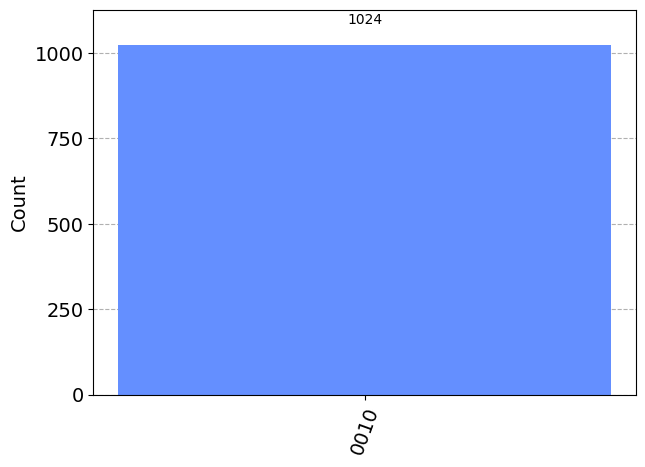

In [56]:
qreg_q = QuantumRegister(8, 'q')
creg_c = ClassicalRegister(4, 'c')
qc = QuantumCircuit(qreg_q, creg_c)

qc.reset(qreg_q[0]) ;qc.x(qreg_q[0])   # 1
qc.reset(qreg_q[1]) 
qc.reset(qreg_q[2]);qc.x(qreg_q[2])   # 1
qc.reset(qreg_q[3])
qc.reset(qreg_q[4]);qc.x(qreg_q[4])   # 1
qc.reset(qreg_q[5])
qc.reset(qreg_q[6]);qc.x(qreg_q[6])   # 1
qc.reset(qreg_q[7])

# Executa no simulador e plota na esfera de Bloch (antes)
sim = Aer.get_backend("aer_simulator")
qc_sv = qc.copy()
qc_sv.save_statevector()
statevector = sim.run(qc_sv).result().get_statevector()
display(plot_bloch_multivector(statevector))
for i in range(0,8):
    qc.h(qreg_q[i])

for i in range(0,7):
    qc.cx(qreg_q[i+1],qreg_q[i])

for i in range(0,8):
    qc.z(qreg_q[i])


for i in range(0,7):
    qc.cx(qreg_q[i+1],qreg_q[i])

for i in range(0,8):
    qc.h(qreg_q[i])   

for i in range(0,3):
    qc.measure(qreg_q[i*2],creg_c[i])   
display(qc.draw())

# Excecuta em um simulador
aer_sim = Aer.get_backend('aer_simulator')
t_dj_circuit = transpile(qc, aer_sim)
qobj = assemble(t_dj_circuit, aer_sim)

# Obtém os resultados
results = aer_sim.run(qobj).result()
answer = results.get_counts()

# Mostra os resultados
plot_histogram(answer)

12P) Construa um circuito de 1 qubit formado apenas pelas portas H, Z, Y aplicadas
nessa ordem. Qual o estado final que obteremos? Mostre o diagrama de circuito e a
plotagem do estado inicial e final na esfera de Bloch.

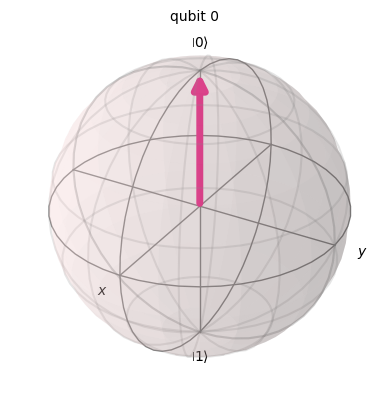

┌───┐┌───┐┌───┐
  q: ┤ H ├┤ Z ├┤ Y ├
     └───┘└───┘└───┘
c: 1/═══════════════

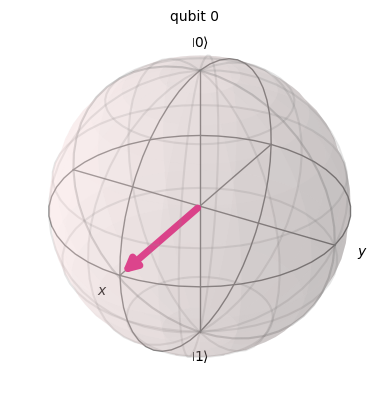

In [57]:
qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
qc = QuantumCircuit(qreg_q, creg_c)


# Executa no simulador e plota na esfera de Bloch (antes)
sim = Aer.get_backend("aer_simulator")
qc_sv = qc.copy()
qc_sv.save_statevector()
statevector = sim.run(qc_sv).result().get_statevector()
display(plot_bloch_multivector(statevector))


qc.h(qreg_q[0])
qc.z(qreg_q[0])
qc.y(qreg_q[0])
#circuit.x(qreg_q[0])
#qc.measure(qreg_q[0], creg_c[0])
display(qc.draw())
# Executa no simulador e plota na esfera de Bloch
sim = Aer.get_backend("aer_simulator")
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
display(plot_bloch_multivector(statevector))

13P) Utilizando portas Hadamard, construa um circuito para gerar números aleatórios
de 2 bits. Execute no simulador e em um protótipo real e mostre os histogramas após a
medição.


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     ├───┤┌─┴─┐└╥┘┌─┐
q_1: ┤ H ├┤ X ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_87040/2833644184.py:19: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


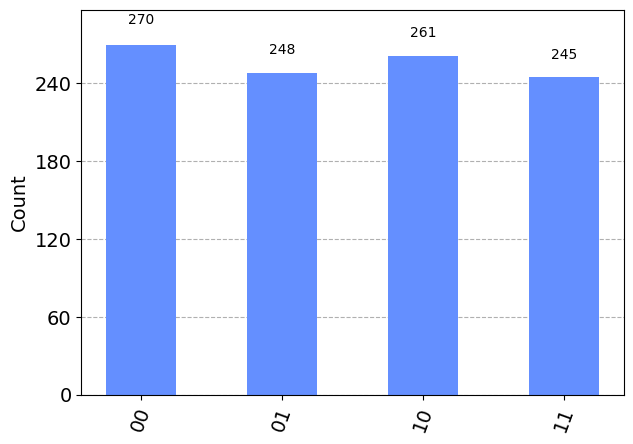

In [58]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qreg_q, creg_c)

qc.h(qreg_q[0])
qc.h(qreg_q[1])
qc.cx(qreg_q[0],qreg_q[1])
qc.measure(qreg_q[0],creg_c[0])

qc.measure(qreg_q[1],creg_c[1])
display(qc.draw())

# Excecuta em um simulador
aer_sim = Aer.get_backend('aer_simulator')
t_dj_circuit = transpile(qc, aer_sim)
qobj = assemble(t_dj_circuit, aer_sim)

# Obtém os resultados
results = aer_sim.run(qobj).result()
answer = results.get_counts()

# Mostra os resultados
plot_histogram(answer)

14P) Utilizando a instrução plot_bloch_vector com coordenadas esféricas do Qiskit,
plote na esfera de Bloch os estados a seguir: |0⟩, |1⟩, |+⟩, |−⟩, |+i⟩, |−i⟩.


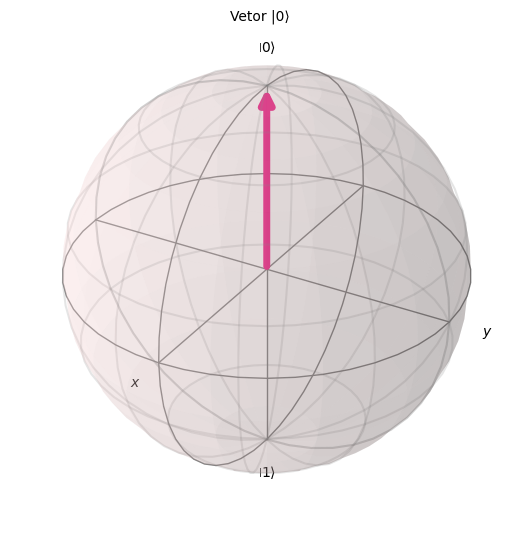

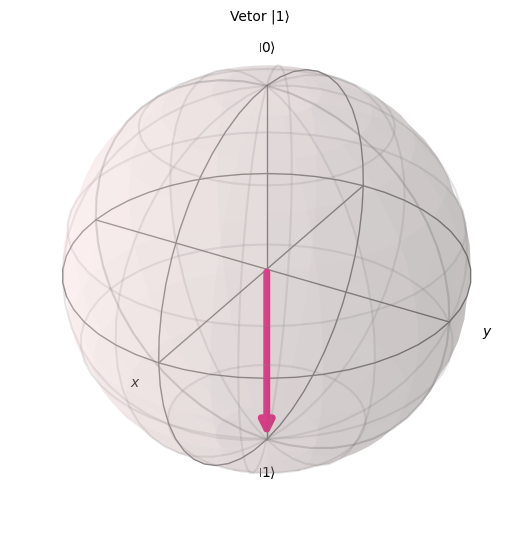

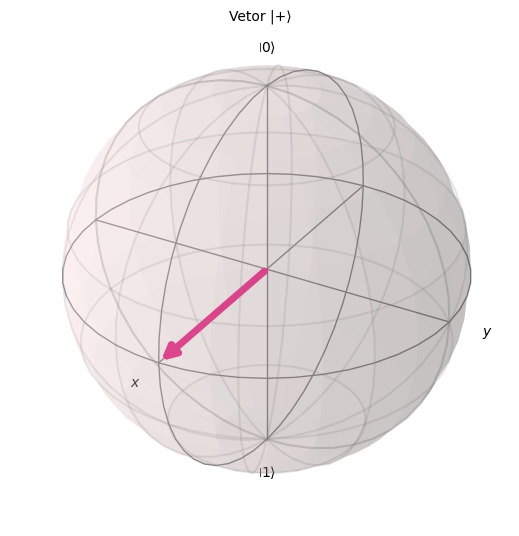

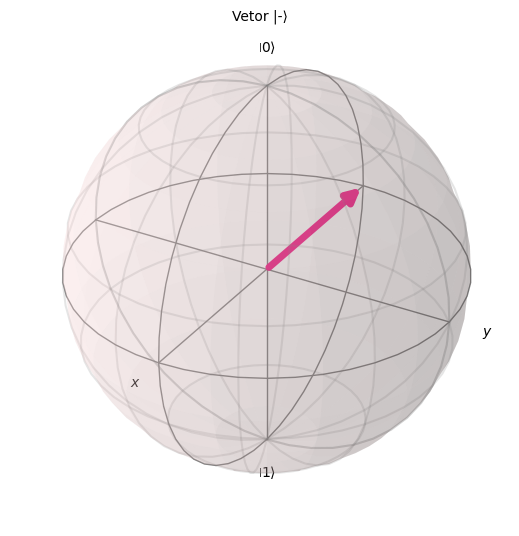

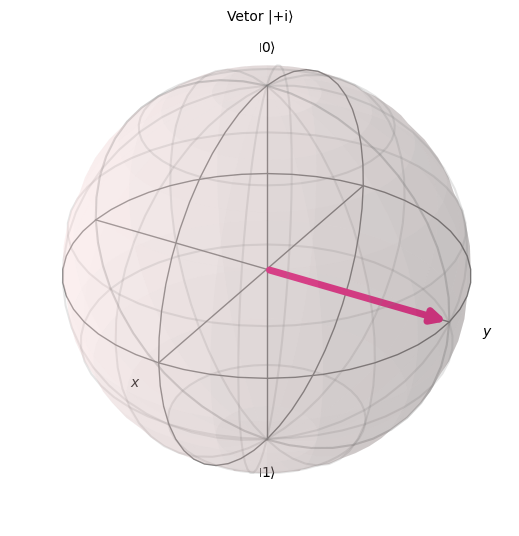

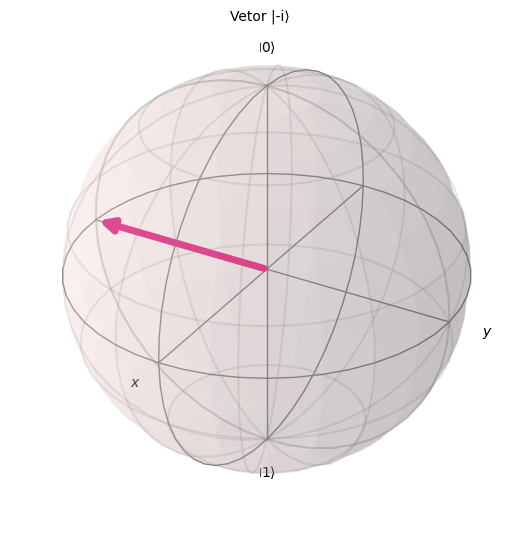

In [59]:
a=1/pow(2,1/2)
display(plot_bloch_vector([0,0,1], title='Vetor |0⟩'))

display(plot_bloch_vector([0,0,-1], title='Vetor |1⟩'))

display(plot_bloch_vector([1,0,0], title='Vetor |+⟩'))

display(plot_bloch_vector([-1,0,0], title='Vetor |-⟩'))

display(plot_bloch_vector([0,1,0], title='Vetor |+i⟩'))

display(plot_bloch_vector([0,-1,0], title='Vetor |-i⟩'))

15P) Construa um circuito de 1 qubit e, utilizando apenas portas H e P, o coloque no estado 
1/√2(  1         )
    (−(√2 + i√2)/2 ) 
expresso na base computacional e com amplitudes de
probabilides reais. Mostre o diagrama de circuito e a plotagem do estado final na
esfera de Bloch.

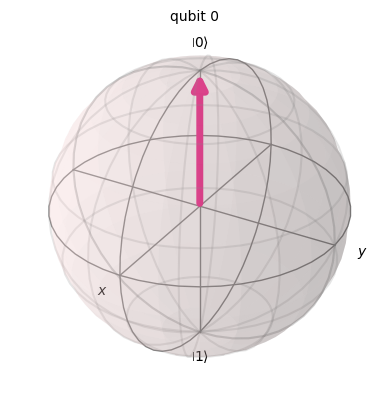

┌───┐┌────────┐
  q: ┤ H ├┤ P(π/4) ├
     └───┘└────────┘
c: 1/═══════════════

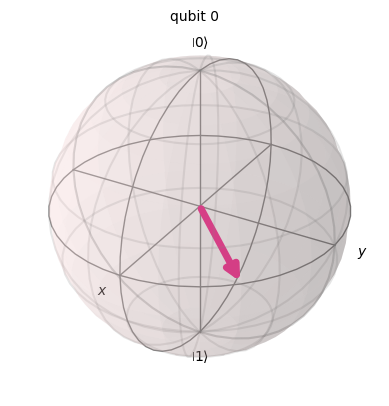

In [60]:
qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
qc = QuantumCircuit(qreg_q,creg_c)

# Executa no simulador e plota na esfera de Bloch (antes)
sim = Aer.get_backend("aer_simulator")
qc_sv = qc.copy()
qc_sv.save_statevector()
statevector = sim.run(qc_sv).result().get_statevector()
display(plot_bloch_multivector(statevector))


qc.h(qreg_q[0])
qc.p(pi/4,qreg_q[0])
#qc.measure(qreg_q[0],creg_c[0])
display(qc.draw())



# Executa no simulador e plota na esfera de Bloch
sim = Aer.get_backend("aer_simulator")
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
display(plot_bloch_multivector(statevector))

16P) Construa um circuito de 2 qubits e os coloque no estado (|q1q0⟩ = |10⟩). Coloque
os dois qubits em superposição. Leve o qubit q0 ao estado |−i⟩ utilizando apenas
portas Z e T, e o qubit q1 ao estado |+i⟩ utilizando apenas a porta S. Mostre o
diagrama de circuito e a plotagem na esfera de Bloch dos estados finais.

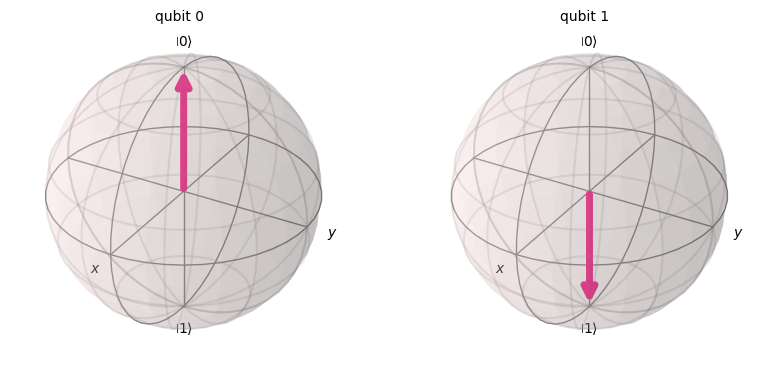

┌───┐┌───┐┌───┐┌───┐     
q_0: ─|0>─┤ H ├┤ Z ├┤ T ├┤ T ├─────
          ├───┤├───┤├───┤├───┤┌───┐
q_1: ─|0>─┤ X ├┤ H ├┤ S ├┤ S ├┤ S ├
          └───┘└───┘└───┘└───┘└───┘

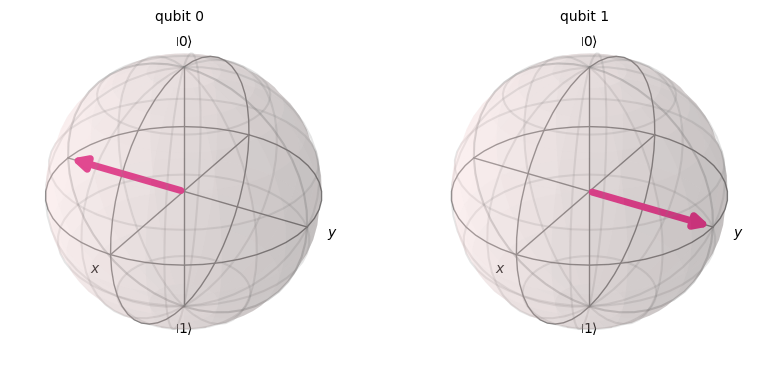

In [61]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qreg_q)

qc.reset(qreg_q[0])
qc.reset(qreg_q[1])
qc.x(qreg_q[1])
# Executa no simulador e plota na esfera de Bloch (antes)
sim = Aer.get_backend("aer_simulator")
qc_sv = qc.copy()
qc_sv.save_statevector()
statevector = sim.run(qc_sv).result().get_statevector()
display(plot_bloch_multivector(statevector))

#qc.h(qreg_q[0])


#qc.cx(qreg_q[0],qreg_q[1])
qc.h(qreg_q[0])
qc.h(qreg_q[1])
qc.z(qreg_q[0])

qc.t(qreg_q[0])
qc.t(qreg_q[0])


qc.s(qreg_q[1])
qc.s(qreg_q[1])

qc.s(qreg_q[1])
#qc.measure(qreg_q[0],creg_c[0])
#qc.measure(qreg_q[1],creg_c[1])
display(qc.draw())

# Executa no simulador e plota na esfera de Bloch
sim = Aer.get_backend("aer_simulator")
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
display(plot_bloch_multivector(statevector))


17P) Vimos que o uso em conjunto de uma porta de Hadamard e uma porta CNOT permite construir um estado emaranhado chamado de estado de Bell. Entretanto, temos outros estados emaranhados que também recebem esse nome. Construa um circuito quântico que implemente o estado de bell: (1/√2) ∗ (|01⟩ + |10⟩). Execute em um simulador e mostre o diagrama de circuito e o histograma do resultado da simulação.

┌───┐┌───┐     ┌─┐   
q_0: ┤ X ├┤ H ├──■──┤M├───
     ├───┤└───┘┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├─────┤ X ├─╫─┤M├
     └───┘     └───┘ ║ └╥┘
c: 2/════════════════╩══╩═
                     0  1

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_87040/3372968868.py:24: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


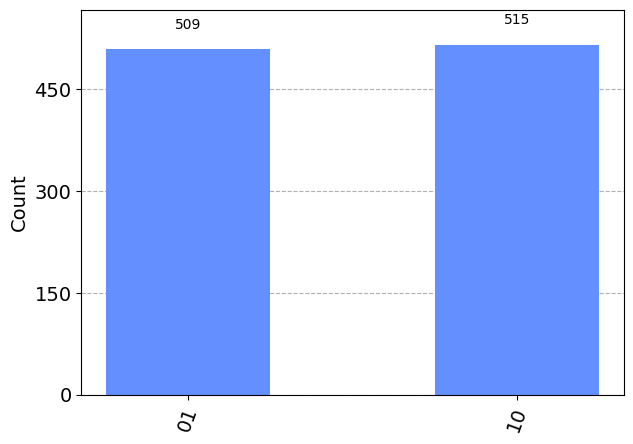

In [62]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qreg_q, creg_c)

#qc.reset(qreg_q[1])
#qc.reset(qreg_q[3])

#setando estado 1
qc.x(qreg_q[0])
qc.x(qreg_q[1])

qc.h(qreg_q[0])
qc.cx(qreg_q[0],qreg_q[1])
qc.measure(qreg_q[0],creg_c[0])
qc.measure(qreg_q[1],creg_c[1])
display(qc.draw())

# Excecuta em um simulador
aer_sim = Aer.get_backend('aer_simulator')
t_dj_circuit = transpile(qc, aer_sim)
qobj = assemble(t_dj_circuit, aer_sim)

# Obtém os resultados
results = aer_sim.run(qobj).result()
answer = results.get_counts()

# Mostra os resultados
plot_histogram(answer)

18P) Construa um circuito com 4 qubits (q0, q1, q2, q3) e 3 bits clássicos (c0, c1, c2) e
prepare os qubits q0 e q2 no estado |1⟩. Aplique ao estado q3 um bit-flip controlado
pelos estados q0 e q2. Em seguida, use o estado q3 para controlar a troca de estados
entre q1 e q2. Realize a medição dos estados q1, q2 e q3 nos bits c0, c1 e c2,
respectivamente. Mostre o diagrama de circuito, execute em um simulador e mostre o
histograma dos resultados.

┌───┐                 
q_0: ─|0>─┤ X ├──■──────────────
          └───┘  │     ┌─┐      
q_1: ────────────┼───X─┤M├──────
          ┌───┐  │   │ └╥┘┌─┐   
q_2: ─|0>─┤ X ├──■───X──╫─┤M├───
          └───┘┌─┴─┐ │  ║ └╥┘┌─┐
q_3: ──────────┤ X ├─■──╫──╫─┤M├
               └───┘    ║  ║ └╥┘
c: 3/═══════════════════╩══╩══╩═
                        0  1  2

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_87040/3550101288.py:30: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


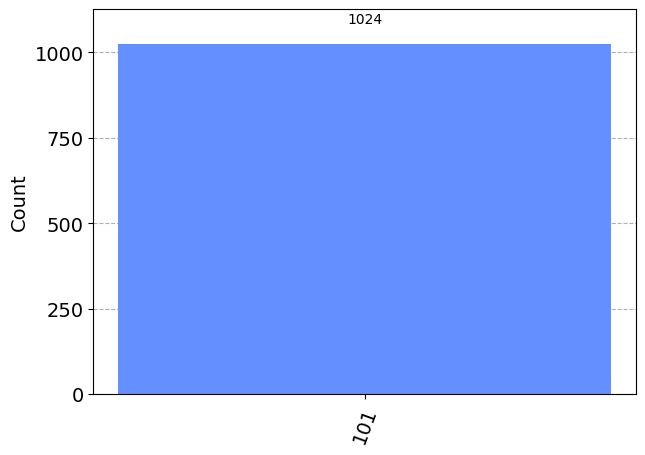

In [63]:
qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qreg_q, creg_c)

qc.reset(qreg_q[0])
#qc.reset(qreg_q[1])
qc.reset(qreg_q[2])
#qc.reset(qreg_q[3])

#setando estado 1
qc.x(qreg_q[0])
qc.x(qreg_q[2])

qc.ccx(qreg_q[0],qreg_q[2],qreg_q[3])

qc.cswap(qreg_q[3],qreg_q[1],qreg_q[2])

qc.measure(qreg_q[1],creg_c[0])
qc.measure(qreg_q[2],creg_c[1])
qc.measure(qreg_q[3],creg_c[2])

display(qc.draw())

# Excecuta em um simulador
aer_sim = Aer.get_backend('aer_simulator')
t_dj_circuit = transpile(qc, aer_sim)
qobj = assemble(t_dj_circuit, aer_sim)

# Obtém os resultados
results = aer_sim.run(qobj).result()
answer = results.get_counts()

# Mostra os resultados
plot_histogram(answer)

19P) A partir do circuito quântico que implementa um Half Adder, construa um Full
Adder. Para as entradas A=1, B=1 e Cin = 1, mostre o circuito final e o histograma dos
resultados da execução em simulador. Execute também em um protótipo real para as
mesmas entradas. Os resultados foram diferentes ou iguais? Explique.

┌───┐                         
q_0: ─|0>─┤ X ├──■────■──────────────■──
          ├───┤  │  ┌─┴─┐          ┌─┴─┐
q_1: ─|0>─┤ X ├──■──┤ X ├──■────■──┤ X ├
          ├───┤  │  └───┘  │  ┌─┴─┐└┬─┬┘
q_2: ─|0>─┤ X ├──┼─────────■──┤ X ├─┤M├─
          └───┘┌─┴─┐     ┌─┴─┐└┬─┬┘ └╥┘ 
q_3: ─|0>──────┤ X ├─────┤ X ├─┤M├───╫──
               └───┘     └───┘ └╥┘   ║  
c: 2/═══════════════════════════╩════╩══
                                1    0

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_87040/3491852647.py:32: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


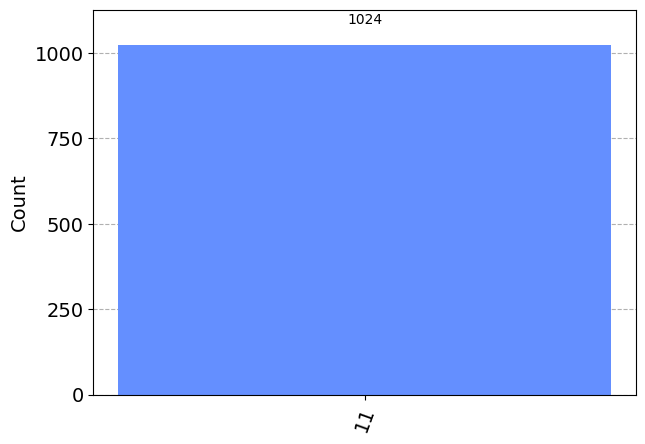

In [64]:
qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qreg_q, creg_c)

qc.reset(qreg_q[0])
qc.reset(qreg_q[1])
qc.reset(qreg_q[2])
qc.reset(qreg_q[3])

#setando estado 1
qc.x(qreg_q[0])
qc.x(qreg_q[1])
qc.x(qreg_q[2])

qc.ccx(qreg_q[0],qreg_q[1],qreg_q[3])
qc.cx(qreg_q[0],qreg_q[1])
qc.ccx(qreg_q[1],qreg_q[2],qreg_q[3])
qc.cx(qreg_q[1],qreg_q[2])
qc.cx(qreg_q[0],qreg_q[1])


qc.measure(qreg_q[2],creg_c[0])
qc.measure(qreg_q[3],creg_c[1])

display(qc.draw())
# Excecuta em um simulador
aer_sim = Aer.get_backend('aer_simulator')
t_dj_circuit = transpile(qc, aer_sim)
qobj = assemble(t_dj_circuit, aer_sim)

# Obtém os resultados
results = aer_sim.run(qobj).result()
answer = results.get_counts()

# Mostra os resultados
plot_histogram(answer)

20P) Para o circuito do Full Adder, aplique uma porta Hadamard em cada uma das
entradas, execute em um simulador e mostre o histograma dos resultados. As
probabilidades medidas correspondem às probabilidades esperadas para as saídas de
8 Full Adders clássicos executando em paralelo com cada um deles utilizando uma das
possíveis combinações de entrada? Explique.

┌───┐┌───┐                         
q_0: ─|0>─┤ X ├┤ H ├──■────■──────────────■──
          ├───┤├───┤  │  ┌─┴─┐          ┌─┴─┐
q_1: ─|0>─┤ X ├┤ H ├──■──┤ X ├──■────■──┤ X ├
          ├───┤├───┤  │  └───┘  │  ┌─┴─┐└┬─┬┘
q_2: ─|0>─┤ X ├┤ H ├──┼─────────■──┤ X ├─┤M├─
          ├───┤└───┘┌─┴─┐     ┌─┴─┐└┬─┬┘ └╥┘ 
q_3: ─|0>─┤ H ├─────┤ X ├─────┤ X ├─┤M├───╫──
          └───┘     └───┘     └───┘ └╥┘   ║  
c: 2/════════════════════════════════╩════╩══
                                     1    0

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_87040/2544596163.py:37: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


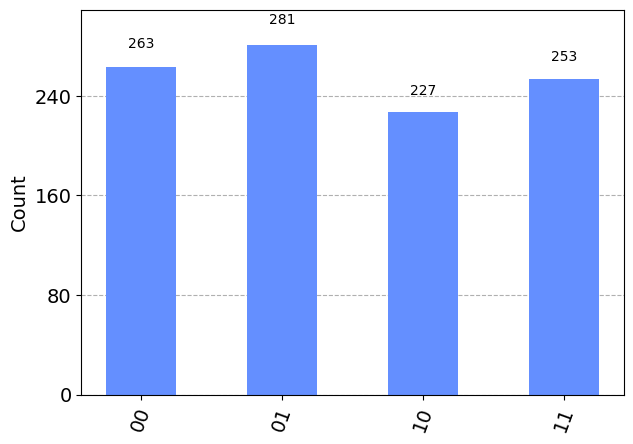

In [65]:
qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qreg_q, creg_c)

qc.reset(qreg_q[0])
qc.reset(qreg_q[1])
qc.reset(qreg_q[2])
qc.reset(qreg_q[3])

#setando estado 1
qc.x(qreg_q[0])
qc.x(qreg_q[1])
qc.x(qreg_q[2])
qc.h(qreg_q[0])
qc.h(qreg_q[1])
qc.h(qreg_q[2])
qc.h(qreg_q[3])


qc.ccx(qreg_q[0],qreg_q[1],qreg_q[3])
qc.cx(qreg_q[0],qreg_q[1])
qc.ccx(qreg_q[1],qreg_q[2],qreg_q[3])
qc.cx(qreg_q[1],qreg_q[2])
qc.cx(qreg_q[0],qreg_q[1])


qc.measure(qreg_q[2],creg_c[0])
qc.measure(qreg_q[3],creg_c[1])

display(qc.draw())
# Excecuta em um simulador
aer_sim = Aer.get_backend('aer_simulator')
t_dj_circuit = transpile(qc, aer_sim)
qobj = assemble(t_dj_circuit, aer_sim)

# Obtém os resultados
results = aer_sim.run(qobj).result()
answer = results.get_counts()

# Mostra os resultados
plot_histogram(answer)

#################################################  FIM ##############################################################################